In [1]:
import numpy as np
import os
import tensorflow as tf
from PIL import Image
import requests

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
model = tf.keras.models.load_model('/content/drive/My Drive/8th_sem_project/Latest/Densenet201_acc96.000.h5')

In [4]:
classes = ["Bacterial leaf blight", "Brown spot", "Leaf smut", "Blast"]
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
IMG_SIZE = (224, 224)

In [6]:
url="http://www.cpsskerala.in/OPC/images/crops/Rice/Disease/32.jpg"
# url="https://lariceman.files.wordpress.com/2010/09/leaf-smut-8-10-4.jpg"
# url="https://www.agric.wa.gov.au/sites/gateway/files/leafblast.jpg"
img = Image.open(requests.get(url, stream=True).raw)
img.mode

'RGB'

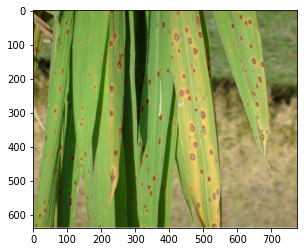

In [7]:
if img.mode in ("rgba", "RGBA"):
    r, g, b, a=img.split()
    img=Image.merge("RGB", (r, g, b))
img_arr = np.asarray(img)
plt.imshow(img_arr)

In [8]:
img_arr = np.asarray(img.resize((224, 224)))
img_batch = np.expand_dims(img_arr, axis=0)
img_preprocessed = preprocess_input(img_batch)

In [9]:
prediction = model.predict(img_preprocessed)

In [10]:
res = [(classes[i], prediction[0][i]*100) for i in range(len(classes))]
res.sort(key=lambda x:x[1], reverse=True)

for k in res:
    print("{:23}: {:08.5f}%".format(k[0], k[1]))

Brown spot             : 99.87122%
Blast                  : 00.12838%
Leaf smut              : 00.00040%
Bacterial leaf blight  : 00.00000%
